####Name : Lokendra J. Sinha
####Roll no : 32-A
#####Branch : AIML
####Date : 28/06/2025

# 🧠 Advanced EDA Exercise (3-Hour Challenge)
**Dataset:** UCI Wine Quality Dataset – Red Wine  
**Tools:** NumPy, Pandas, Matplotlib, Seaborn

## 📝 Instructions
Download the file `winequality-red.csv` and complete the following tasks.

## 🔧 Part 1: Advanced Data Wrangling (30 mins)

🔧 Part 1: Advanced Data Wrangling (30 mins)
Load the data and display:

Top and bottom 3 rows.

DataFrame memory usage in MB (optimize by changing column dtypes if needed).

Detect and remove:

Exact duplicates.

Rows with more than one standard deviation below the mean in more than 3 columns.

Create new features:

acid_sugar_ratio = fixed acidity / residual sugar

sulfate_acidity = sulphates / volatile acidity

Cap values in chlorides and volatile acidity at 99th percentile using NumPy.

In [ ]:
# Load libraries
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("/content/winequality-red.csv", delimiter=';')



In [ ]:
# Top and bottom 3 rows
print("Top 3 rows:")
df.head(3)


Top 3 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
print("\nBottom 3 rows:")

df.tail(3)




Bottom 3 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#DataFrame memory usage in MB (optimize by changing column dtypes if needed).
print("\n DataFrame memory usage in MB")
print(df.memory_usage(deep=True).sum() / (1024 * 1024))










 DataFrame memory usage in MB
0.1509552001953125


In [ ]:
#Detect and remove:
#• Exact duplicates.
# • Rows with more than one standard deviation below the mean in more than 3
# columns.
means = df.mean()
stds = df.std()

# Identify rows where a value is more than one standard deviation below the mean
outlier_mask = (df < (means - stds)).sum(axis=1) > 3

# Remove the identified rows
df = df[~outlier_mask]

print(f"\nNumber of rows removed based on standard deviation outlier detection: {outlier_mask.sum()}")
print(f"Remaining number of rows: {len(df)}")



Number of rows removed based on standard deviation outlier detection: 18
Remaining number of rows: 1504


In [ ]:
# Create new features
df['acid_sugar_ratio'] = df['fixed acidity'] / df['residual sugar']
df['sulfate_acidity'] = df['sulphates'] / df['volatile acidity']


# Cap chlorides and volatile acidity at 99th percentile
chlorides_99th = df['chlorides'].quantile(0.99)
volatile_acidity_99th = df['volatile acidity'].quantile(0.99)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acid_sugar_ratio,sulfate_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3.894737,0.800000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3.000000,0.772727
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3.391304,0.855263
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.894737,2.071429
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3.894737,0.800000


## 📊 Part 2: Multi-level Grouping and Aggregation (30 mins)

Bin the quality column into:

Low (<=4), Medium (5-6), and High (>=7) using pd.cut.

Using groupby and agg, compute:

Mean, std, and IQR for alcohol, sulphates, and citric acid across quality bins.

Mean difference of alcohol and volatile acidity between High and Low wines.

Create a multi-index pivot table:

Index: quality_group, Columns: quantile bins of alcohol, Values: density mean

In [ ]:

# Bin quality
df['quality_group'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])

# Define aggregation functions for IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# Aggregate data across quality bins
agg_funcs = ['mean', 'std', iqr]
quality_agg = df.groupby('quality_group').agg({
    'alcohol': agg_funcs,
    'sulphates': agg_funcs,
    'citric acid': agg_funcs
})

print("Aggregation by Quality Group:")
print(quality_agg)

# Mean difference between High and Low wines
high_low_diff_alcohol = df[df['quality_group'] == 'High']['alcohol'].mean() - df[df['quality_group'] == 'Low']['alcohol'].mean()
high_low_diff_volatile_acidity = df[df['quality_group'] == 'High']['volatile acidity'].mean() - df[df['quality_group'] == 'Low']['volatile acidity'].mean()

print(f"\nMean difference in alcohol (High - Low): {high_low_diff_alcohol:.2f}")
print(f"Mean difference in volatile acidity (High - Low): {high_low_diff_volatile_acidity:.2f}")

# Create quantile bins for alcohol
df['alcohol_quantile_bin'] = pd.qcut(df['alcohol'], q=5, labels=False, duplicates='drop')

# Create multi-index pivot table
pivot_table = df.pivot_table(index='quality_group', columns='alcohol_quantile_bin', values='density', aggfunc='mean')

print("\nMulti-index Pivot Table (Density Mean):")
pivot_table

Aggregation by Quality Group:
                 alcohol                  sulphates                  \
                    mean       std    iqr      mean       std   iqr   
quality_group                                                         
Low            10.064103  0.961560  1.250  0.639744  0.268421  0.11   
Medium         10.230540  0.944767  1.300  0.652237  0.167313  0.16   
High           11.480083  1.006223  1.325  0.750100  0.131680  0.17   

              citric acid                    
                     mean       std     iqr  
quality_group                                
Low              0.249487  0.224358  0.3450  
Medium           0.262941  0.186799  0.3100  
High             0.380000  0.196016  0.1925  

Mean difference in alcohol (High - Low): 1.42
Mean difference in volatile acidity (High - Low): -0.25

Multi-index Pivot Table (Density Mean):


/tmp/ipython-input-16-3484804427.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quality_agg = df.groupby('quality_group').agg({
/tmp/ipython-input-16-3484804427.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='quality_group', columns='alcohol_quantile_bin', values='density', aggfunc='mean')


alcohol_quantile_bin,0,1,2,3,4
quality_group,,,,,
Low,0.997724,0.997634,0.997221,0.996601,0.994927
Medium,0.997572,0.997281,0.997221,0.996483,0.995276
High,0.998425,0.998460,0.997561,0.996748,0.995353


## 📈 Part 3: Advanced Visual Exploration (45 mins)

Plot customized visuals:

Overlay KDE plots for alcohol by quality_group.

Plot violin plots for residual sugar grouped by quality_group and hue on binned pH.

Generate a heatmap showing:

Pearson and Spearman correlations side-by-side (subplot), sorted by correlation with quality.

Create a diverging bar chart showing:

Z-scores of mean alcohol, citric acid, and density by quality levels.

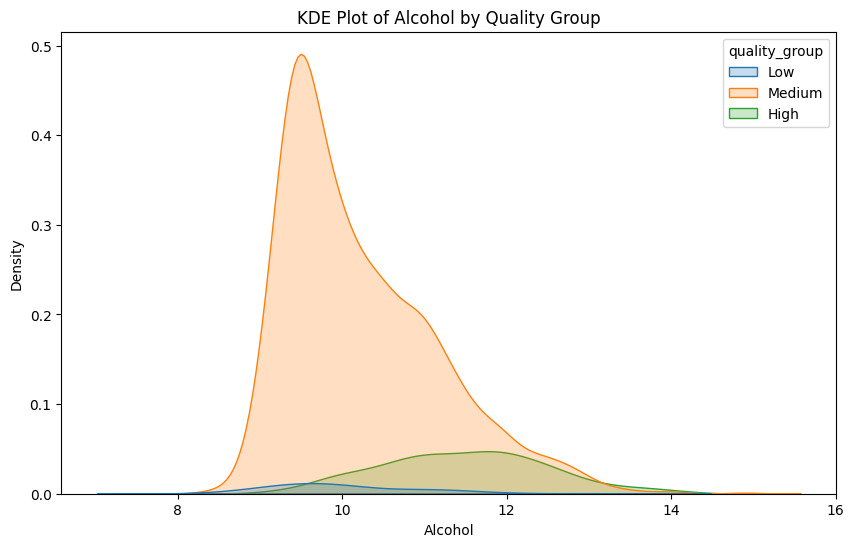

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Overlay KDE plots for alcohol by quality_group
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='alcohol', hue='quality_group', fill=True)
plt.title('KDE Plot of Alcohol by Quality Group')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

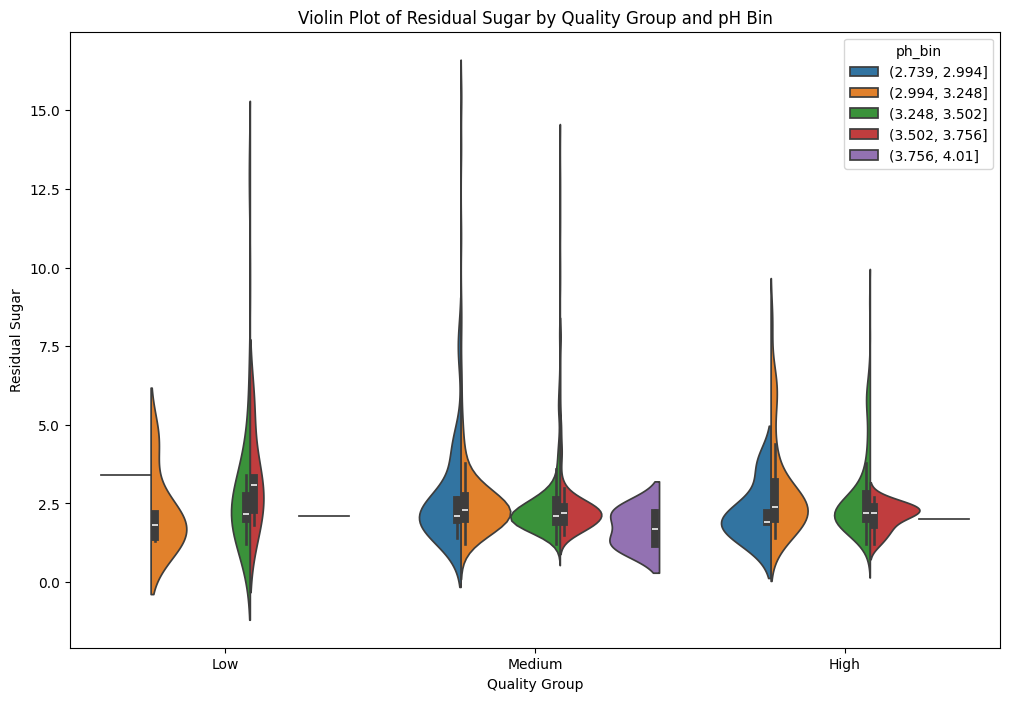

In [ ]:

# Bin pH
df['ph_bin'] = pd.cut(df['pH'], bins=5) # You can adjust the number of bins

# Plot violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='quality_group', y='residual sugar', hue='ph_bin', split=True)
plt.title('Violin Plot of Residual Sugar by Quality Group and pH Bin')
plt.xlabel('Quality Group')
plt.ylabel('Residual Sugar')
plt.show()

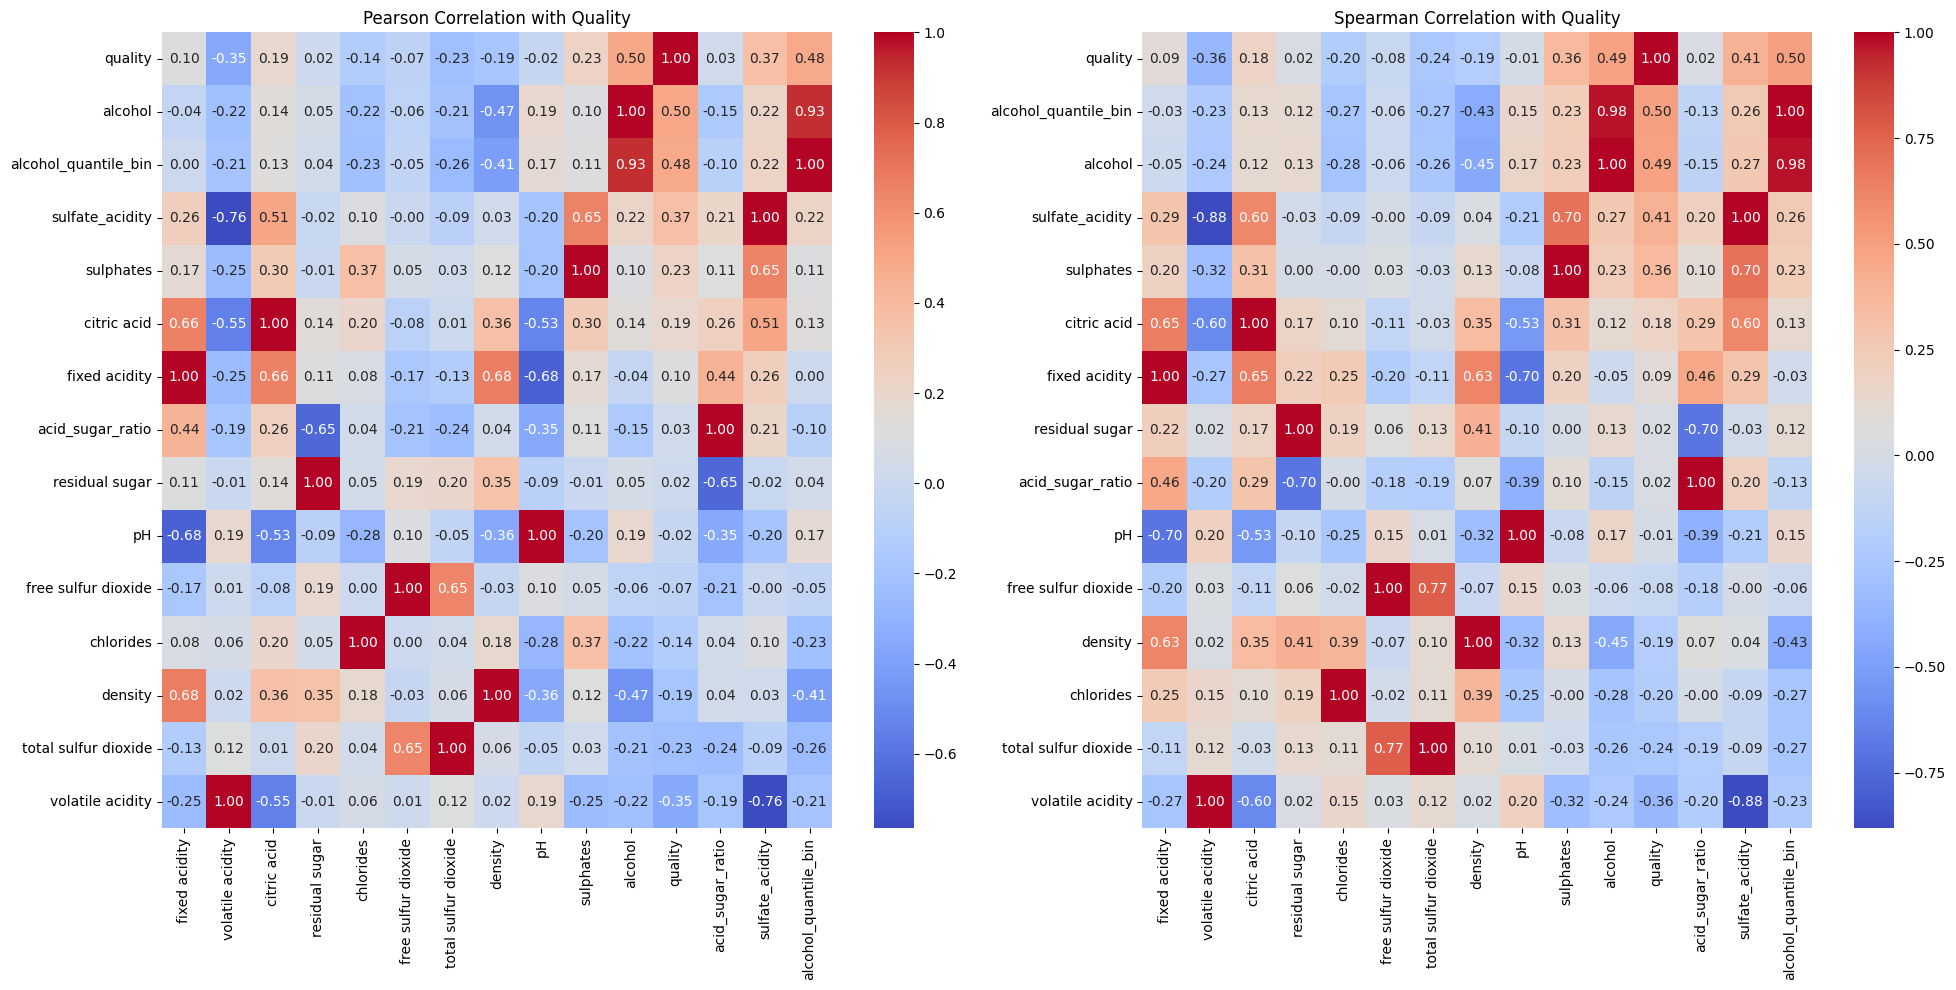

In [ ]:

# Calculate correlation matrices
numerical_df = df.select_dtypes(include=np.number) # Select only numerical columns
pearson_corr = numerical_df.corr(method='pearson')
spearman_corr = numerical_df.corr(method='spearman')

# Sort by correlation with quality
pearson_sorted = pearson_corr.sort_values(by='quality', ascending=False)
spearman_sorted = spearman_corr.sort_values(by='quality', ascending=False)

# Set up the matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot Pearson correlation heatmap
sns.heatmap(pearson_sorted, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Pearson Correlation with Quality')

# Plot Spearman correlation heatmap
sns.heatmap(spearman_sorted, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Spearman Correlation with Quality')

plt.tight_layout()
plt.show()

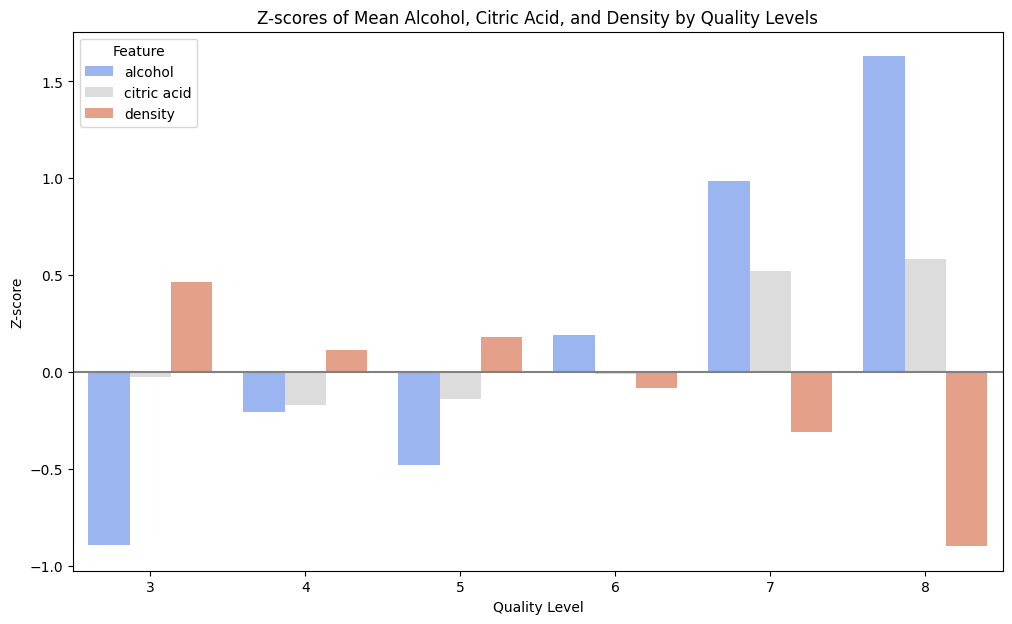

In [ ]:
#Create a diverging bar chart showing:
# Z-scores of mean alcohol, citric acid, and density by quality levels.

import matplotlib.pyplot as plt
# Calculate the mean and standard deviation for each column
# Select only numerical columns for mean and std calculation
numerical_df = df.select_dtypes(include=np.number)
means = numerical_df.mean()
stds = numerical_df.std()

# Calculate the mean of the selected features grouped by quality
quality_means = df.groupby('quality')[['alcohol', 'citric acid', 'density']].mean()

# Calculate the Z-scores of the quality means relative to the overall dataset mean and std
# Use the overall dataset mean and std for standardization across different quality groups
zscore_quality_means = (quality_means - means[['alcohol', 'citric acid', 'density']]) / stds[['alcohol', 'citric acid', 'density']]

# Reshape the data for plotting
zscore_quality_means_melted = zscore_quality_means.reset_index().melt(id_vars='quality', var_name='feature', value_name='zscore')

# Create the diverging bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=zscore_quality_means_melted, x='quality', y='zscore', hue='feature', palette='coolwarm')
plt.axhline(0, color='grey', lw=1.5) # Add a horizontal line at Z=0
plt.title('Z-scores of Mean Alcohol, Citric Acid, and Density by Quality Levels')
plt.xlabel('Quality Level')
plt.ylabel('Z-score')
plt.legend(title='Feature')
plt.show()

## 🔬 Part 4: Outlier Strategies and Detection (30 mins)

Implement 3 different outlier detection methods on total sulfur dioxide:

IQR method

Z-score method (NumPy)

MAD (Median Absolute Deviation)

Compare how many outliers are detected per method and create a Venn diagram of overlapping ones (use set logic).

Remove the most extreme outliers (intersection of all methods) and compare group-wise means before and after.

In [ ]:
# Implement 3 different outlier detection methods on total sulfur dioxide:
# IQR method
# Z-score method (NumPy)
# MAD (Median Absolute Deviation)


# IQR method for 'total sulfur dioxide'
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = df[(df['total sulfur dioxide'] < (Q1 - 1.5 * IQR)) | (df['total sulfur dioxide'] > (Q3 + 1.5 * IQR))]
iqr_outlier_indices = set(iqr_outliers.index)
print(f"\nIQR Method: {len(iqr_outlier_indices)} outliers detected")

# Z-score method for 'total sulfur dioxide' (using NumPy)
mean_ts = np.mean(df['total sulfur dioxide'])
std_ts = np.std(df['total sulfur dioxide'])
z_scores_ts = (df['total sulfur dioxide'] - mean_ts) / std_ts
zscore_outliers = df[np.abs(z_scores_ts) > 3] # Common threshold for Z-score
zscore_outlier_indices = set(zscore_outliers.index)
print(f"Z-score Method: {len(zscore_outlier_indices)} outliers detected (threshold > 3)")

# MAD (Median Absolute Deviation) for 'total sulfur dioxide'
median_ts = np.median(df['total sulfur dioxide'])
mad_ts = np.median(np.abs(df['total sulfur dioxide'] - median_ts))
# A common threshold for MAD is 3 or 3.5 times a scaling factor (often 1.4826 for normality)
mad_threshold = 3.5 * 1.4826 * mad_ts
mad_outliers = df[np.abs(df['total sulfur dioxide'] - median_ts) > mad_threshold]
mad_outlier_indices = set(mad_outliers.index)
print(f"MAD Method: {len(mad_outlier_indices)} outliers detected (threshold > 3.5*1.4826*MAD)")


IQR Method: 49 outliers detected
Z-score Method: 15 outliers detected (threshold > 3)
MAD Method: 37 outliers detected (threshold > 3.5*1.4826*MAD)


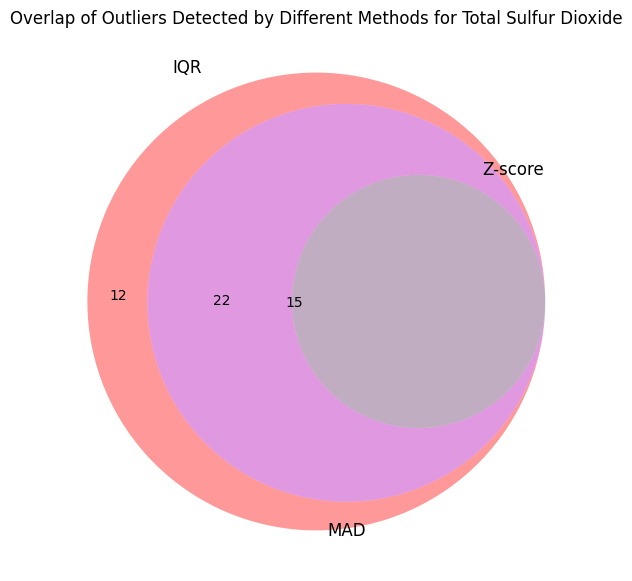


Number of extreme outliers (intersection of all methods): 15

Initial Group-wise Means:
               total sulfur dioxide    alcohol  sulphates
quality_group                                            
Low                       43.871795  10.064103   0.639744
Medium                    49.836364  10.230540   0.652237
High                      35.980000  11.480083   0.750100

Group-wise Means After Removing Extreme Outliers:
               total sulfur dioxide    alcohol  sulphates
quality_group                                            
Low                       43.871795  10.064103   0.639744
Medium                    48.777955  10.231576   0.652340
High                      33.479798  11.471801   0.752525

Difference in Group-wise Means (Initial - Cleaned):


/tmp/ipython-input-30-2010699602.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  initial_group_means = df.groupby('quality_group')[['total sulfur dioxide', 'alcohol', 'sulphates']].mean()
/tmp/ipython-input-30-2010699602.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_group_means = df_cleaned.groupby('quality_group')[['total sulfur dioxide', 'alcohol', 'sulphates']].mean()


,total sulfur dioxide,alcohol,sulphates
quality_group,,,
Low,0.000000,0.000000,0.000000
Medium,1.058408,-0.001036,-0.000103
High,2.500202,0.008282,-0.002425


In [ ]:

# Compare how many outliers are detected per method and create a Venn diagram of overlapping ones (use set logic).
# Remove the most extreme outliers (intersection of all methods) and compare group-wise means before and after.

import matplotlib.pyplot as plt

!pip install matplotlib-venn

from matplotlib_venn import venn3

# Create a Venn diagram
plt.figure(figsize=(10, 7))
venn3([iqr_outlier_indices, zscore_outlier_indices, mad_outlier_indices],
      set_labels=('IQR', 'Z-score', 'MAD'))
plt.title('Overlap of Outliers Detected by Different Methods for Total Sulfur Dioxide')
plt.show()

# Identify the intersection of all methods (most extreme outliers)
extreme_outlier_indices = iqr_outlier_indices.intersection(zscore_outlier_indices).intersection(mad_outlier_indices)
print(f"\nNumber of extreme outliers (intersection of all methods): {len(extreme_outlier_indices)}")

# Compare group-wise means before and after removing extreme outliers
# Calculate initial group-wise means for relevant columns
initial_group_means = df.groupby('quality_group')[['total sulfur dioxide', 'alcohol', 'sulphates']].mean()
print("\nInitial Group-wise Means:")
print(initial_group_means)

# Create a DataFrame without the extreme outliers
df_cleaned = df.drop(index=list(extreme_outlier_indices))

# Calculate group-wise means after removing extreme outliers
cleaned_group_means = df_cleaned.groupby('quality_group')[['total sulfur dioxide', 'alcohol', 'sulphates']].mean()
print("\nGroup-wise Means After Removing Extreme Outliers:")
print(cleaned_group_means)

# Optional: Calculate the difference in means
mean_difference = initial_group_means - cleaned_group_means
print("\nDifference in Group-wise Means (Initial - Cleaned):")
mean_difference


## ⚙️ Part 5: Functionalized Insights + Summary (30 mins)

Create a reusable function feature_stats(df, col) that returns:

Skewness, kurtosis, 95th percentile, and missing %.

Create a decorator @timeit to time the execution of heavy visualizations (matplotlib, seaborn).

Build a final dashboard with subplots using matplotlib:

Histograms of top 3 correlated features with quality.

A single pairplot of only High and Low quality wines with citric acid, alcohol, and pH.


Top 3 features correlated with quality (Pearson): ['alcohol', 'alcohol_quantile_bin', 'sulfate_acidity']


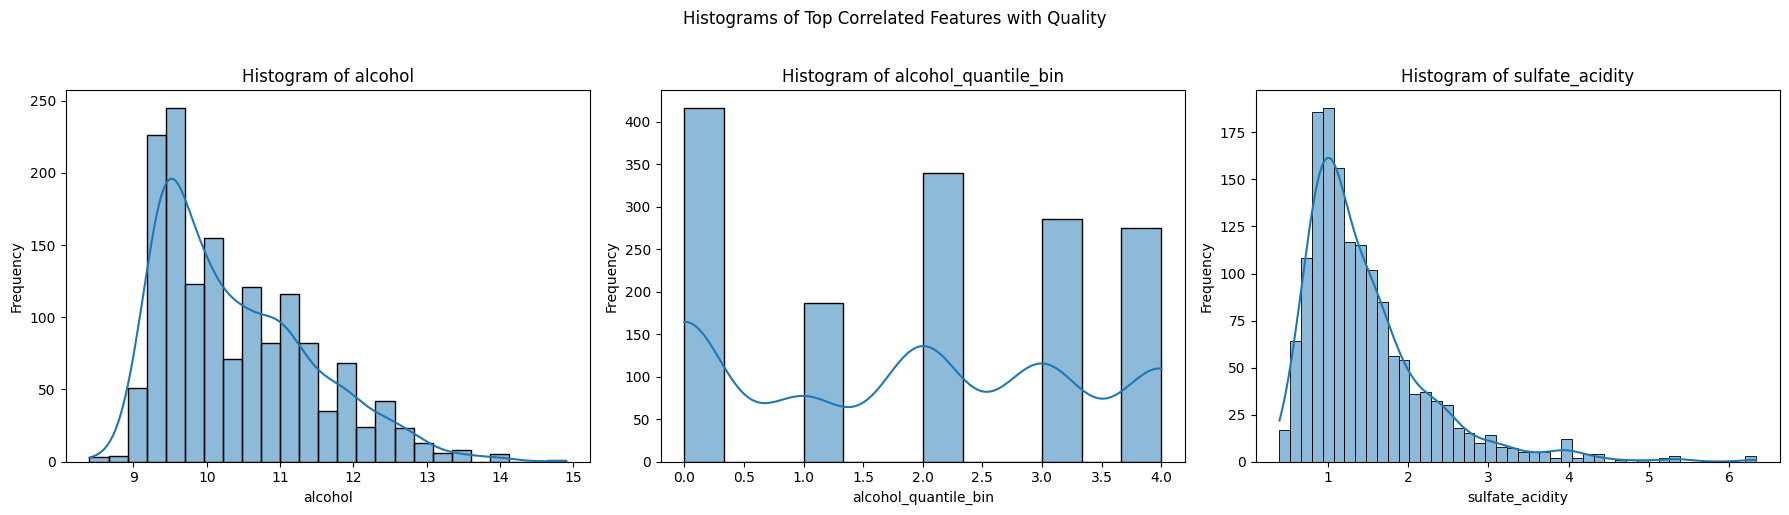

Function 'plot_histograms' executed in 0.7668 seconds.


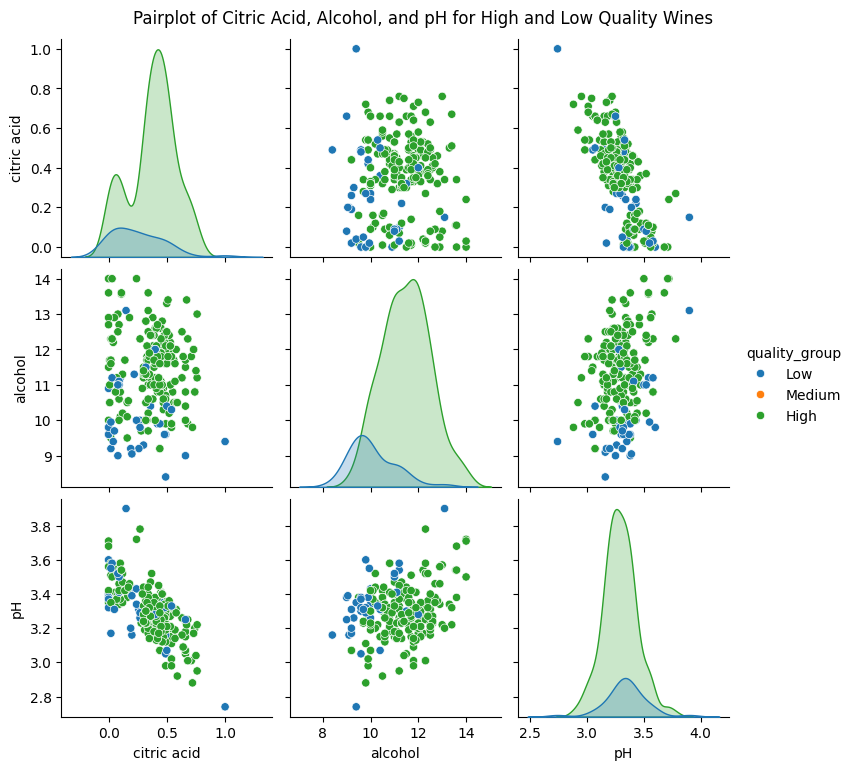

Function 'plot_pairplot' executed in 2.1618 seconds.

Feature stats for 'alcohol':
{'Skewness': np.float64(0.8823643909167553), 'Kurtosis': np.float64(0.275075330878336), '95th Percentile': np.float64(12.4), 'Missing %': np.float64(0.0)}

Feature stats for 'fixed acidity':
{'Skewness': np.float64(1.008718684861432), 'Kurtosis': np.float64(1.1744732748038387), '95th Percentile': np.float64(11.9), 'Missing %': np.float64(0.0)}

Feature stats for a non-existent column:
{'error': "Column 'non_existent_column' not found in DataFrame."}


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import time
from functools import wraps

def feature_stats(df, col):
  """
  Calculates key statistics for a given column in a DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    col (str): The name of the column to analyze.

  Returns:
    dict: A dictionary containing skewness, kurtosis, 95th percentile,
          and missing percentage for the specified column.
  """
  if col not in df.columns:
    return {"error": f"Column '{col}' not found in DataFrame."}

  stats = {}
  stats['Skewness'] = df[col].skew()
  stats['Kurtosis'] = df[col].kurtosis()
  stats['95th Percentile'] = df[col].quantile(0.95)
  stats['Missing %'] = df[col].isnull().sum() / len(df) * 100

  return stats

def timeit(func):
  """
  A decorator to measure the execution time of a function.
  """
  @wraps(func)
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    print(f"Function '{func.__name__}' executed in {end_time - start_time:.4f} seconds.")
    return result
  return wrapper

# Apply the timeit decorator to the plotting functions
@timeit
def plot_histograms(df, features):
  fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 5))
  if len(features) == 1:
      axes = [axes]  # Ensure axes is iterable even for one subplot
  fig.suptitle('Histograms of Top Correlated Features with Quality', y=1.02)
  for i, col in enumerate(features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
  plt.tight_layout()
  plt.show()

@timeit
def plot_pairplot(df, features, quality_groups):
  df_filtered = df[df['quality_group'].isin(quality_groups)]
  sns.pairplot(data=df_filtered, vars=features, hue='quality_group', diag_kind='kde')
  plt.suptitle('Pairplot of Citric Acid, Alcohol, and pH for High and Low Quality Wines', y=1.02)
  plt.show()

# Build the final dashboard
# Find top 3 correlated features with quality (using Pearson from earlier analysis)
# Assuming 'pearson_corr' from Part 3 is available
quality_correlation = pearson_corr['quality'].drop('quality').sort_values(ascending=False)
top_correlated_features = quality_correlation.head(3).index.tolist()

print("\nTop 3 features correlated with quality (Pearson):", top_correlated_features)

# Plotting Histograms
plot_histograms(df, top_correlated_features)

# Plotting Pairplot
pairplot_features = ['citric acid', 'alcohol', 'pH']
plot_pairplot(df, pairplot_features, ['High', 'Low'])

# Example usage of feature_stats function
print("\nFeature stats for 'alcohol':")
print(feature_stats(df, 'alcohol'))

print("\nFeature stats for 'fixed acidity':")
print(feature_stats(df, 'fixed acidity'))

print("\nFeature stats for a non-existent column:")
print(feature_stats(df, 'non_existent_column'))